<img src = "https://images2.imgbox.com/c1/79/4H1V1tSO_o.png" width="1200">

## Preparação de Dados - Sberbank
---

In [1]:
# Libs essenciais para o tratamento da base inicial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
features_a_manter = [
    # Sem muita discussão quanto a essas, são bem básicas
    'id', 'timestamp', 
    'full_sq', 'life_sq', 'floor', 'max_floor',
    'material', 'build_year', 'num_room', 'kitch_sq', 'state',
    #'product_type',
    'sub_area',
    # Filtrando demais features para termos algo em torno de 15?
    # População e áreas
    'area_m', 'raion_popul',
    # Quantidade de locais importantes por distrito
    'healthcare_centers_raion',
    'university_top_20_raion',
    'shopping_centers_raion',
    'oil_chemistry_raion',
    'nuclear_reactor_raion',
    
    # Distribuição da população
    'full_all',
    'young_all',
    'work_all',
    'ekder_all',
    # Distâncias a locais importantes
    'kremlin_km',
    'big_road1_km',
    'railroad_km',
    'zd_vokzaly_avto_km',
    'metro_km_avto',
    'metro_km_walk',
    'radiation_km',
    # Variável resposta!!!!
    'price_doc'
]

In [3]:
dados = pd.read_csv('datasets/dados_treino.csv')[features_a_manter]

In [4]:
dados.state = dados.state.astype('category')
dados.material = dados.material.astype('category')

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25290 entries, 0 to 25289
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        25290 non-null  int64   
 1   timestamp                 25290 non-null  object  
 2   full_sq                   25290 non-null  int64   
 3   life_sq                   18907 non-null  float64 
 4   floor                     25123 non-null  float64 
 5   max_floor                 15718 non-null  float64 
 6   material                  15718 non-null  category
 7   build_year                11685 non-null  float64 
 8   num_room                  15718 non-null  float64 
 9   kitch_sq                  15718 non-null  float64 
 10  state                     11731 non-null  category
 11  sub_area                  25290 non-null  object  
 12  area_m                    25290 non-null  float64 
 13  raion_popul               25290 non-null  int6

In [6]:
# Separando apenas os dados preenchidos para amostrar
dados_preenchidos = dados.dropna()
dados_restantes = dados.drop(dados_preenchidos.index)

In [7]:
# Separando 35% dos dados preenchidos como teste
amostra_teste = dados_preenchidos.sample(frac=0.35)
amostra_treino = dados_preenchidos.drop(amostra_teste.index)

# Concatenando com a base que possui missings
dados_final = pd.concat([dados_restantes,amostra_treino])

In [8]:
dados_restantes.isna().sum()

id                              0
timestamp                       0
full_sq                         0
life_sq                      6383
floor                         167
max_floor                    9572
material                     9572
build_year                  13605
num_room                     9572
kitch_sq                     9572
state                       13559
sub_area                        0
area_m                          0
raion_popul                     0
healthcare_centers_raion        0
university_top_20_raion         0
shopping_centers_raion          0
oil_chemistry_raion             0
nuclear_reactor_raion           0
full_all                        0
young_all                       0
work_all                        0
ekder_all                       0
kremlin_km                      0
big_road1_km                    0
railroad_km                     0
zd_vokzaly_avto_km              0
metro_km_avto                   0
metro_km_walk                  25
radiation_km  

In [9]:
# Tamanhos finais
print('Total Treino com dados preenchidos')
print(dados_final.shape)
print('Total Teste com dados preenchidos')
print(amostra_teste.shape)


Total Treino com dados preenchidos
(21923, 31)
Total Teste com dados preenchidos
(3367, 31)


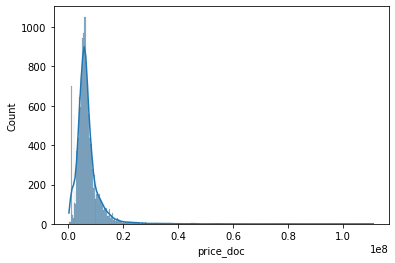

In [10]:
sns.histplot(dados_final.price_doc, kde=True);

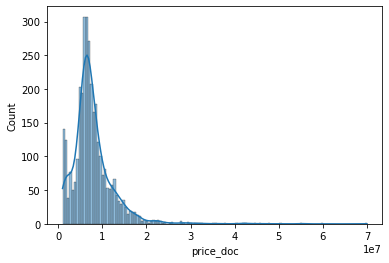

In [11]:
sns.histplot(amostra_teste.price_doc, kde=True);

In [12]:
from scipy.stats import zscore

z_score = zscore(amostra_teste.select_dtypes(exclude=['object','category']))
teste_z_score = np.abs(z_score) < 3
dados_full_no_out = amostra_teste[teste_z_score.all(axis=1)]

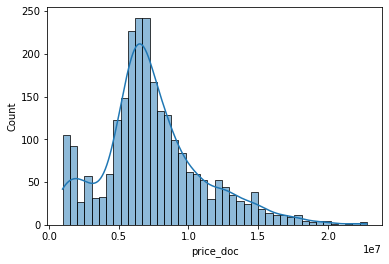

In [13]:
sns.histplot(dados_full_no_out.price_doc, kde=True);

In [14]:
dados_final.dtypes

id                             int64
timestamp                     object
full_sq                        int64
life_sq                      float64
floor                        float64
max_floor                    float64
material                    category
build_year                   float64
num_room                     float64
kitch_sq                     float64
state                       category
sub_area                      object
area_m                       float64
raion_popul                    int64
healthcare_centers_raion       int64
university_top_20_raion        int64
shopping_centers_raion         int64
oil_chemistry_raion           object
nuclear_reactor_raion         object
full_all                       int64
young_all                      int64
work_all                       int64
ekder_all                      int64
kremlin_km                   float64
big_road1_km                 float64
railroad_km                  float64
zd_vokzaly_avto_km           float64
m

In [15]:
amostra_teste

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,work_all,ekder_all,kremlin_km,big_road1_km,railroad_km,zd_vokzaly_avto_km,metro_km_avto,metro_km_walk,radiation_km,price_doc
17101,12847,2013-12-05,32,16.0,1.0,12.0,1.0,1974.0,1.0,7.0,...,43472,15350,4.539165,0.311600,0.492897,2.457301,0.353121,0.353121,3.343987,6450000
17755,14266,2014-01-29,46,21.0,28.0,30.0,1.0,2012.0,1.0,11.0,...,59366,31147,9.249992,4.708331,0.978536,6.663555,0.887434,0.776785,0.181137,5428800
20000,19137,2014-05-30,74,46.0,7.0,16.0,1.0,1984.0,3.0,10.0,...,78835,29848,11.209999,3.240732,3.394731,13.211594,2.438813,2.389887,1.599327,13600000
22865,25274,2014-11-25,38,19.0,6.0,10.0,1.0,1995.0,1.0,8.0,...,140182,57086,16.457609,0.673663,1.136306,17.403403,0.247242,0.247242,2.193937,6250000
22708,24918,2014-11-19,85,40.0,18.0,20.0,6.0,2017.0,3.0,10.0,...,120381,29529,18.206690,1.331232,1.141171,15.971891,0.617664,0.617664,4.976837,11331272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25096,29979,2015-05-27,45,30.0,4.0,5.0,1.0,1961.0,2.0,5.0,...,65782,24312,9.399809,2.215726,3.251573,10.287240,0.645690,0.645690,0.711370,8400000
23368,26310,2014-12-12,59,44.0,6.0,9.0,1.0,1967.0,3.0,6.0,...,93843,39573,16.747772,1.391572,2.281554,16.116811,1.542359,0.727130,2.674954,8900000
24510,28657,2015-03-27,47,47.0,21.0,21.0,1.0,2016.0,1.0,1.0,...,65115,16058,6.514713,1.412825,0.042636,7.586885,2.117112,2.083685,0.740870,9960155
24384,28396,2015-03-16,60,33.0,2.0,25.0,1.0,2006.0,2.0,9.0,...,65613,30261,10.273935,0.959153,1.271310,8.649753,2.707047,2.707047,1.526755,16300000


In [16]:
# Salvando arquivos finais
#dados_final.to_csv('../1. Dados/sberbank_treino.csv')
dados_full_no_out.to_csv('datasets/sberbank_teste.csv')

### Preparação de Dados - Wine
---

In [17]:
# Carregando alguns módulos essenciais para trabalharmos os dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Algumas opções do Pandas boas para vermos muitas linhas e colunas de uma vez
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# Carregando os dados
dados = pd.read_csv('datasets/winequalityN.csv')
#dados_teste = pd.read_csv('../1. Dados/dados_treino.csv',index_col=0)

In [18]:
# Construindo uma target binária
dados['aprovado'] = (dados['quality']>5).astype('int')

In [19]:
dados_neg = dados[dados.aprovado==0]
dados_pos = dados[dados.aprovado==1].sample(n=len(dados_neg))

In [20]:
print(len(dados_pos))
print(len(dados_neg))

2384
2384


In [21]:
dados.aprovado.mean()

0.6330614129598277

In [22]:
dados_final = pd.concat([dados_pos,dados_neg]).reset_index()

In [23]:
dados_final

,index,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,aprovado
0,1187,white,6.6,0.210,0.38,2.2,0.026,40.0,104.0,0.99140,3.25,0.40,11.1,8,1
1,1333,white,7.8,0.210,0.39,1.8,0.034,62.0,180.0,0.99100,3.09,0.75,12.6,8,1
2,747,white,7.2,0.290,0.40,7.6,NaN,56.0,177.0,0.99280,3.04,0.32,11.5,6,1
3,954,white,7.6,0.220,0.34,9.7,0.035,26.0,143.0,0.99650,3.08,0.49,9.8,6,1
4,3371,white,6.2,0.300,0.21,1.1,0.032,31.0,111.0,0.98890,2.97,0.42,12.2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,6480,red,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5,0
4764,6481,red,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5,0
4765,6487,red,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5,0
4766,6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0


In [24]:
# Amostrando
dados_teste = dados_final.dropna().sample(frac=0.2,random_state=1234).drop(['index','quality'],axis=1)
dados_treino = dados_final.drop(dados_teste.index).drop(['index','quality'],axis=1)

In [25]:
dados_teste.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,aprovado
2193,white,5.9,0.18,0.28,5.1,0.039,50.0,139.0,0.99165,3.16,0.44,11.3,1
4424,red,8.1,0.87,0.00,2.2,0.084,10.0,31.0,0.99656,3.25,0.50,9.8,0
2110,white,6.1,0.15,0.29,6.2,0.046,39.0,151.0,0.99471,3.60,0.44,10.6,1
3218,white,6.9,0.30,0.21,15.7,0.056,49.0,159.0,0.99827,3.11,0.48,9.0,0
1397,red,10.0,0.41,0.45,6.2,0.071,6.0,14.0,0.99702,3.21,0.49,11.8,1


In [26]:
dados_treino.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,aprovado
0,white,6.6,0.21,0.38,2.2,0.026,40.0,104.0,0.9914,3.25,0.40,11.1,1
1,white,7.8,0.21,0.39,1.8,0.034,62.0,180.0,0.9910,3.09,0.75,12.6,1
2,white,7.2,0.29,0.40,7.6,NaN,56.0,177.0,0.9928,3.04,0.32,11.5,1
3,white,7.6,0.22,0.34,9.7,0.035,26.0,143.0,0.9965,3.08,0.49,9.8,1
4,white,6.2,0.30,0.21,1.1,0.032,31.0,111.0,0.9889,2.97,0.42,12.2,1


In [27]:
# Verificando
print(dados_treino.aprovado.mean())
print(dados_teste.aprovado.mean())

0.4967268918565069
0.5131717597471022


In [28]:
# Salvando dados finais
dados_treino.reset_index().to_csv('datasets/transf_wine_treino.csv')
dados_teste.reset_index().to_csv('datasets/transf_wine_teste.csv')

---